## Explore the Input Variables

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# read in relevant datasets

# input variables for clustering
cluster_1 = pd.read_csv("cluster_1_data.csv").drop(columns=["Unnamed: 0"])

# list of ascending LSOAs
ascending_LSOAs = pd.read_csv("ascending_LSOA_basic.csv").drop(columns=["Unnamed: 0"])

In [3]:
# extract only LSOA codes for ascending LSOAs

ascending_LSOAs = ascending_LSOAs.drop(ascending_LSOAs.columns[1:],axis=1)

In [4]:
cluster_1 = cluster_1.rename(columns = {
 'avg_churn_01_10':'avg_churn_11_20',
 'agePop_01':'agePop_11'})

In [5]:
cluster_1.head()

,LSOA11CD,conv_rates,newblt_rates,avg_churn_11_20,youngPop_chg,agePop_chg,hse_age_chg,hse_noKids_chg,hse_depKids_chg,hse_noDepKids_chg,agePop_11
0,E01000001,2.90135,0.00000,0.4534,-3.69,2.15,5.51,2.20,1.82,-1.05,18.29
1,E01000002,2.22222,1.48148,0.4868,0.34,-1.65,-0.15,-0.27,-4.48,0.72,18.74
2,E01000003,2.08333,0.00000,0.3947,-0.24,3.43,-4.24,5.92,-2.79,0.70,18.87
3,E01000005,0.00000,8.94454,0.3819,1.87,-2.20,-3.50,1.43,0.07,3.19,12.89
4,E01000006,7.15564,1.78891,0.3633,-1.15,1.41,0.83,-4.68,5.37,1.53,7.80


In [6]:
ascending_LSOAs.head()

,LSOA_Code
0,E01000037
1,E01000121
2,E01000126
3,E01000135
4,E01000140


In [7]:
# merge ascending LSOAs with their corresponding input variables

cluster_1 = ascending_LSOAs.merge(cluster_1, left_on = "LSOA_Code", right_on = "LSOA11CD", how = "left").set_index("LSOA_Code").drop(columns=["LSOA11CD"])

In [8]:
cluster_1.head()

,conv_rates,newblt_rates,avg_churn_01_10,youngPop_chg,agePop_chg,hse_age_chg,hse_noKids_chg,hse_depKids_chg,hse_noDepKids_chg,agePop_01
LSOA_Code,,,,,,,,,,
E01000037,0.00000,1.68067,0.3013,-3.61,2.29,-0.59,-3.32,1.60,1.83,12.91
E01000121,3.85356,1.92678,0.2017,-2.34,4.61,1.36,1.03,-9.81,6.99,13.50
E01000126,3.58423,2.38949,0.2198,-2.77,3.41,-1.35,-0.02,-10.98,7.60,5.56
E01000135,11.90476,5.29101,0.4271,-0.35,0.65,-0.11,-1.88,0.51,1.55,18.81
E01000140,4.64576,5.80720,0.5082,1.46,-1.04,-0.24,3.74,2.00,1.56,11.82


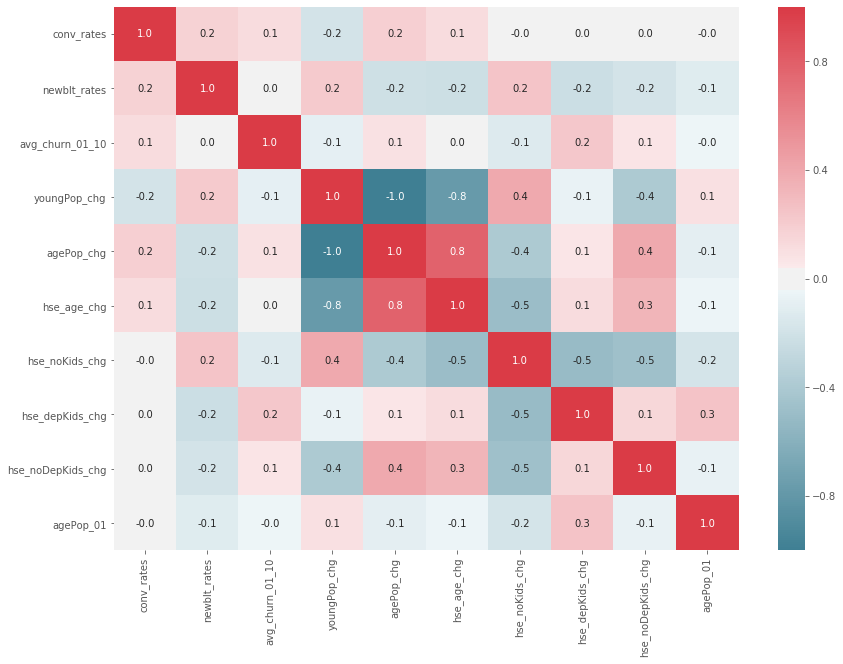

In [8]:
# check for multi-collinearity between variables

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(cluster_1.corr(), cmap=cmap, center=0, annot=True, fmt=".1f")

In [8]:
# removing 2 variables which have exhibited high multi-collinearity

cluster_1 = cluster_1.drop(columns=['youngPop_chg','hse_age_chg'])

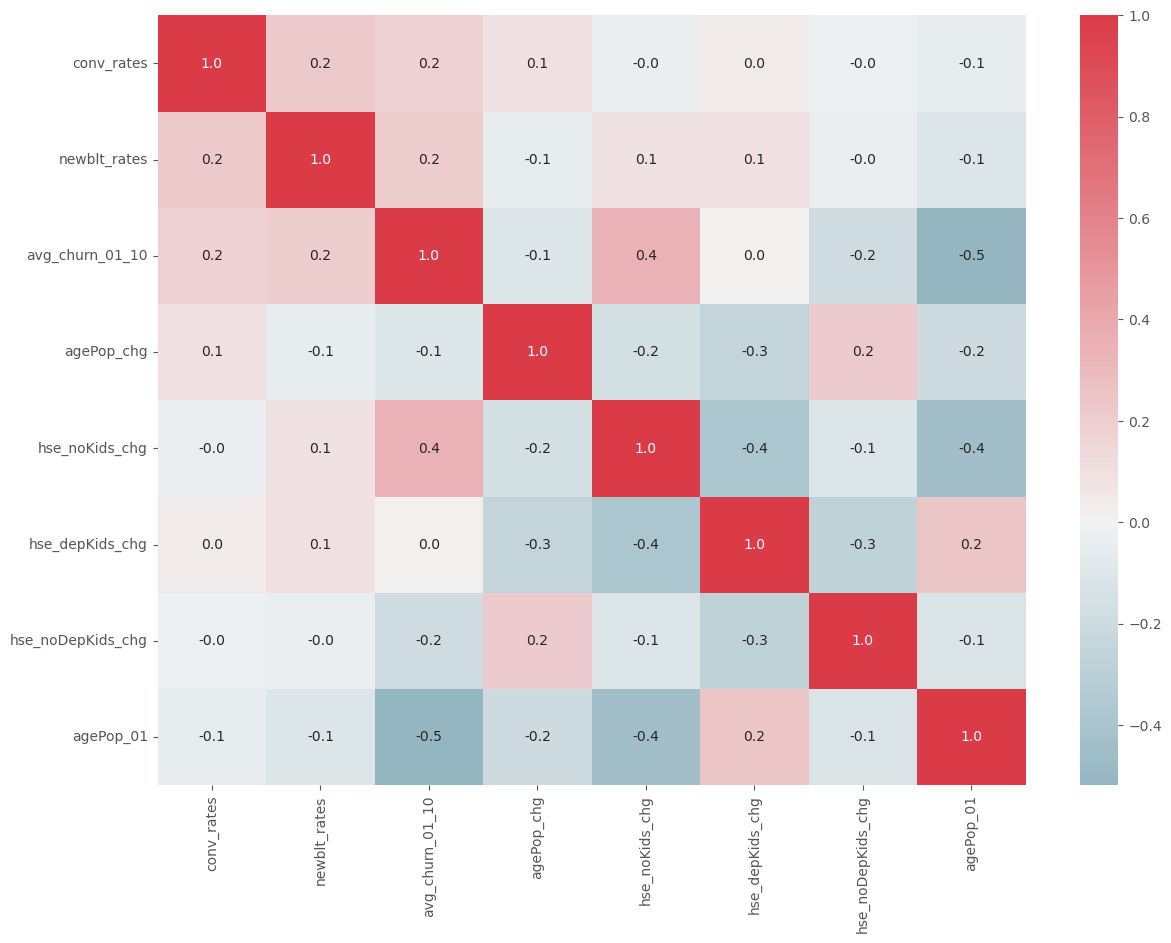

In [10]:
# check for multi-collinearity between variables

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(cluster_1.corr(), cmap=cmap, center=0, annot=True, fmt=".1f")

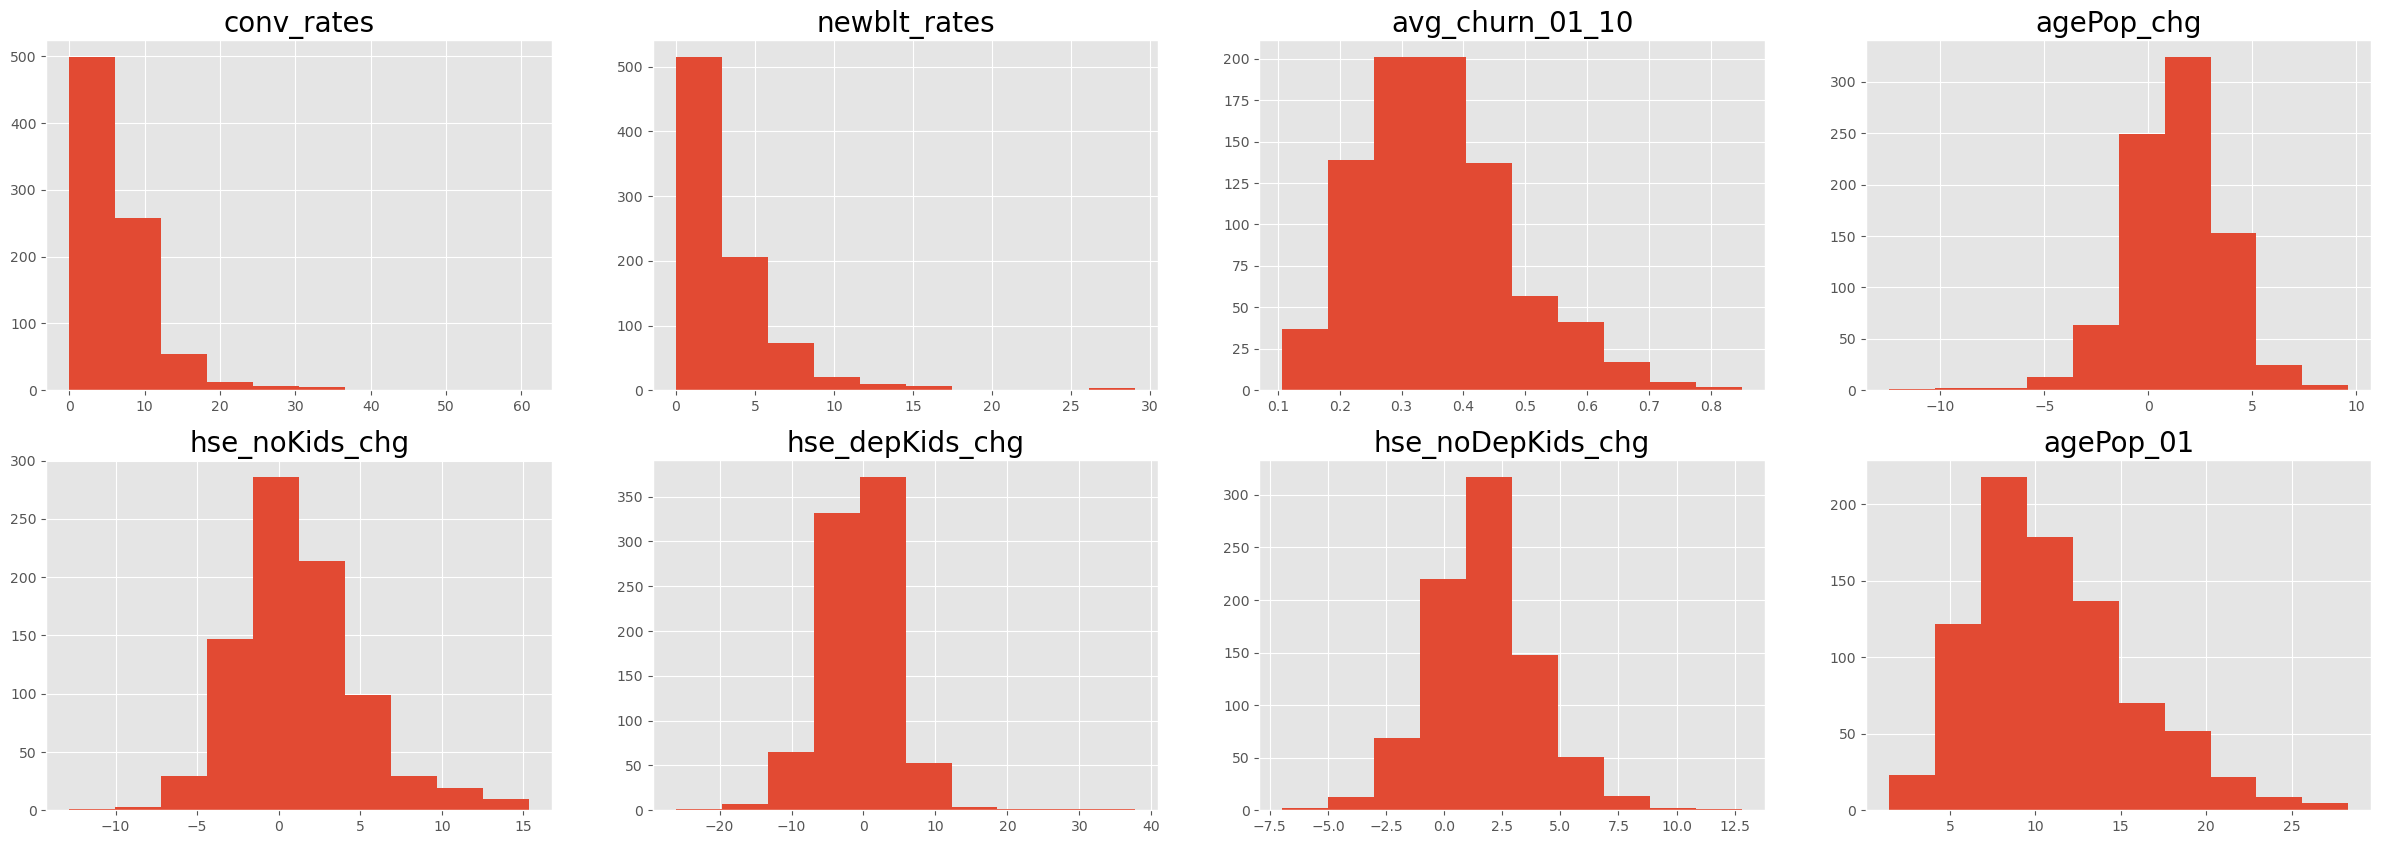

<Figure size 640x480 with 0 Axes>

In [12]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10))

counter = 0
for i in range(2):
    for j in range(4):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_1.columns):

            ax.hist(cluster_1[cluster_1.columns[counter]], label='{}'.format(cluster_1.columns[counter]))
            ax.set_title(cluster_1.columns[counter], fontsize=20)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1
        
plt.show()
        
# to output high-resolution image - uncomment the next line
plt.savefig('Cluster_1_hist.png', dpi = 100)

## Transform the Input Variables

In [9]:
# without any transformation

cluster_1_noTrans = cluster_1[:]

In [10]:
# applying cube root transformation to data variables

cluster_1_cubeRoot = np.cbrt(cluster_1)

In [11]:
cluster_1_cubeRoot.head()

,conv_rates,newblt_rates,avg_churn_11_20,agePop_chg,hse_noKids_chg,hse_depKids_chg,hse_noDepKids_chg,agePop_11
LSOA_Code,,,,,,,,
E01000037,0.000000,1.188942,0.670399,1.318090,-1.491807,1.169607,1.223161,2.345896
E01000121,1.567788,1.244354,0.586456,1.664308,1.009902,-2.140703,1.912020,2.381102
E01000126,1.530378,1.336909,0.603498,1.505167,-0.271442,-2.222631,1.966095,1.771570
E01000135,2.283356,1.742527,0.753084,0.866239,-1.234201,0.798957,1.157295,2.659477
E01000140,1.668600,1.797445,0.798016,-1.013159,1.552234,1.259921,1.159778,2.277924


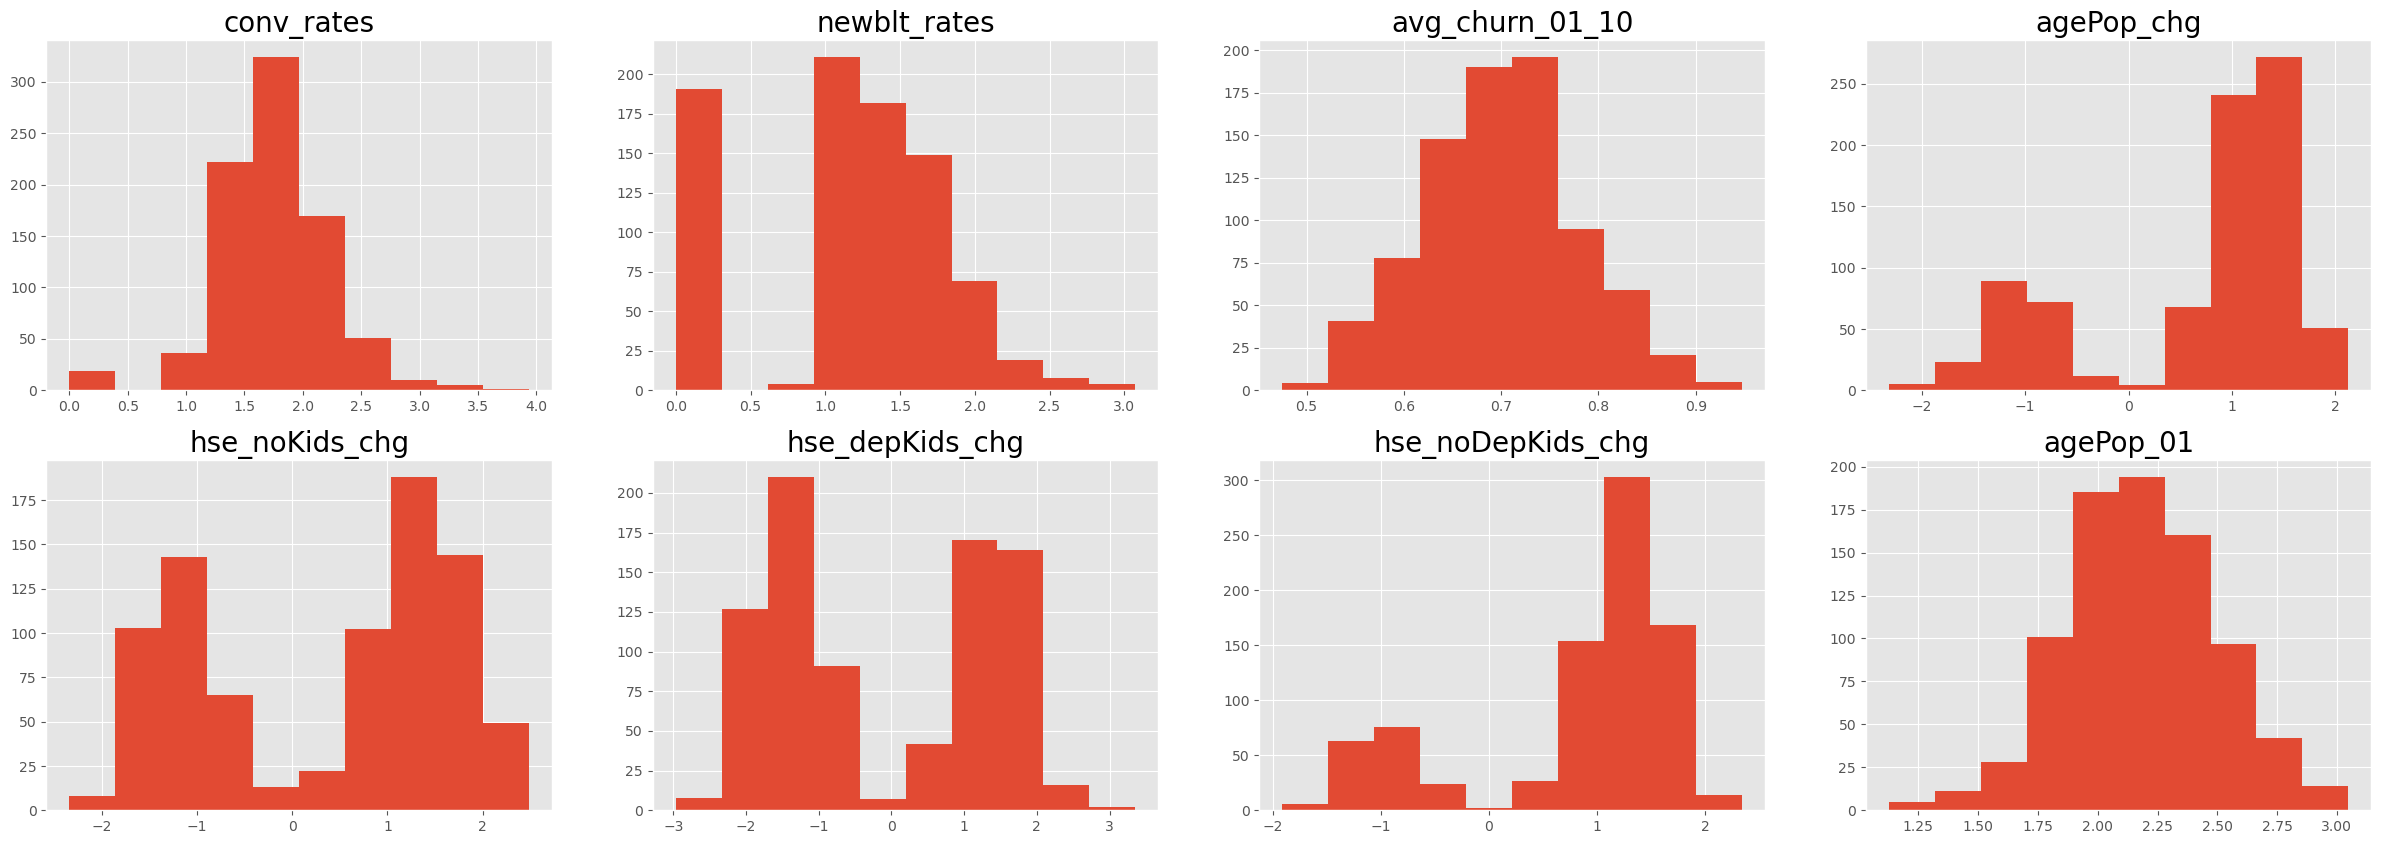

<Figure size 640x480 with 0 Axes>

In [16]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10))

counter = 0
for i in range(2):
    for j in range(4):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_1_cubeRoot.columns):

            ax.hist(cluster_1_cubeRoot[cluster_1_cubeRoot.columns[counter]], label='{}'.format(cluster_1_cubeRoot.columns[counter]))
            ax.set_title(cluster_1_cubeRoot.columns[counter], fontsize=20)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1


plt.show()

# to output high-resolution image - uncomment the next line
plt.savefig('cluster_1_cubeRoot_hist.png', dpi = 100)

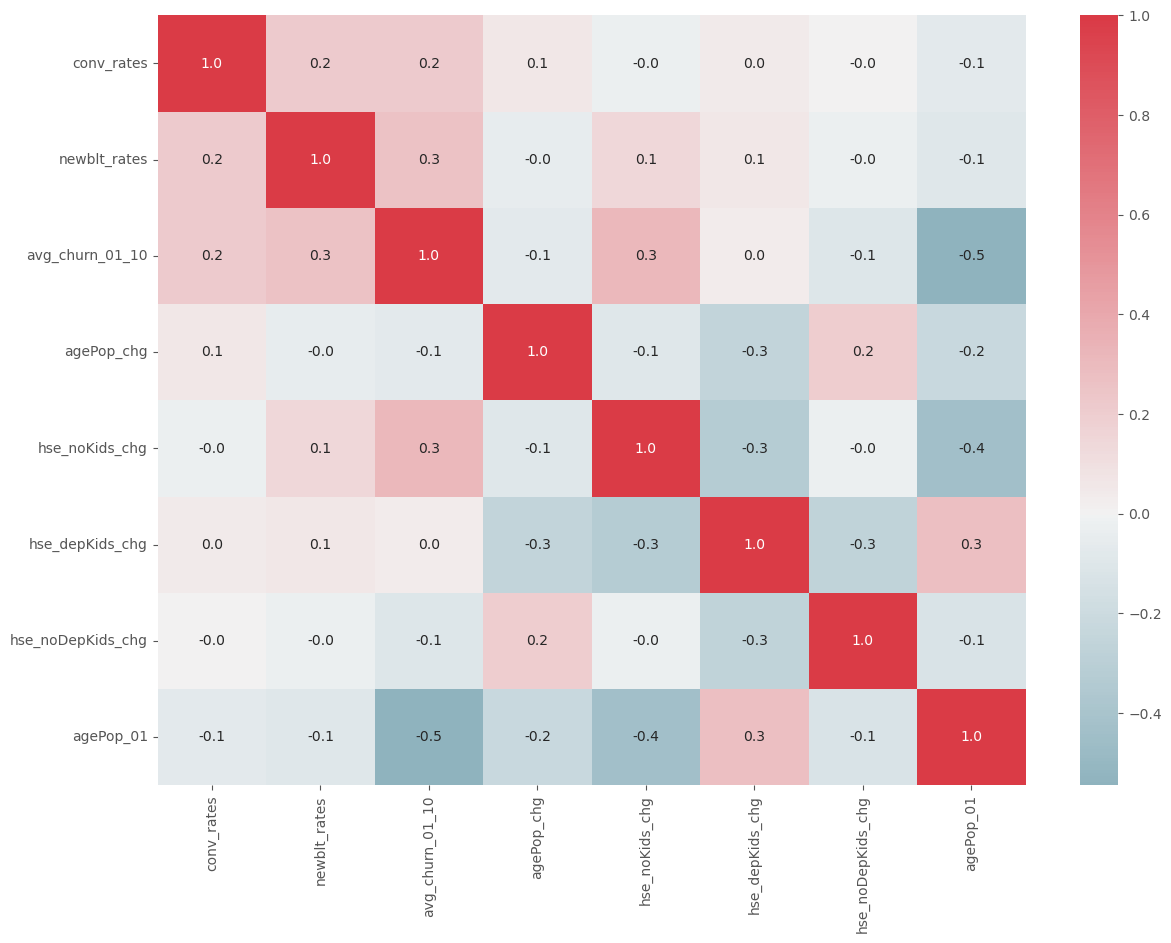

In [17]:
# check for multi-collinearity between variables

fig10, ax = plt.subplots()
fig10.set_size_inches(14, 10)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(cluster_1_cubeRoot.corr(), cmap=cmap, annot=True, fmt=".1f", center=0)

In [12]:
# applying the Yeo-Johnson transformation to data variables

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
pt.fit(cluster_1)

cluster_1_yeoJohnson = pt.transform(cluster_1)

In [13]:
cluster_1_yeoJohnson = pd.DataFrame(cluster_1_yeoJohnson, index = cluster_1.index, columns = cluster_1.columns)

In [14]:
cluster_1_yeoJohnson.head()

,conv_rates,newblt_rates,avg_churn_11_20,agePop_chg,hse_noKids_chg,hse_depKids_chg,hse_noDepKids_chg,agePop_11
LSOA_Code,,,,,,,,
E01000037,-2.896848,-0.141268,-0.375229,0.385277,-1.313146,0.415031,0.079978,0.523110
E01000121,-0.463361,-0.025389,-1.454220,1.502408,0.056227,-1.882204,2.218109,0.635724
E01000126,-0.557305,0.167567,-1.238796,0.916424,-0.229191,-2.122397,2.462698,-1.320581
E01000135,1.221034,0.971310,0.684390,-0.354068,-0.815197,0.203286,-0.041476,1.521050
E01000140,-0.212283,1.072729,1.234339,-1.034581,0.711956,0.492299,-0.037123,0.305348


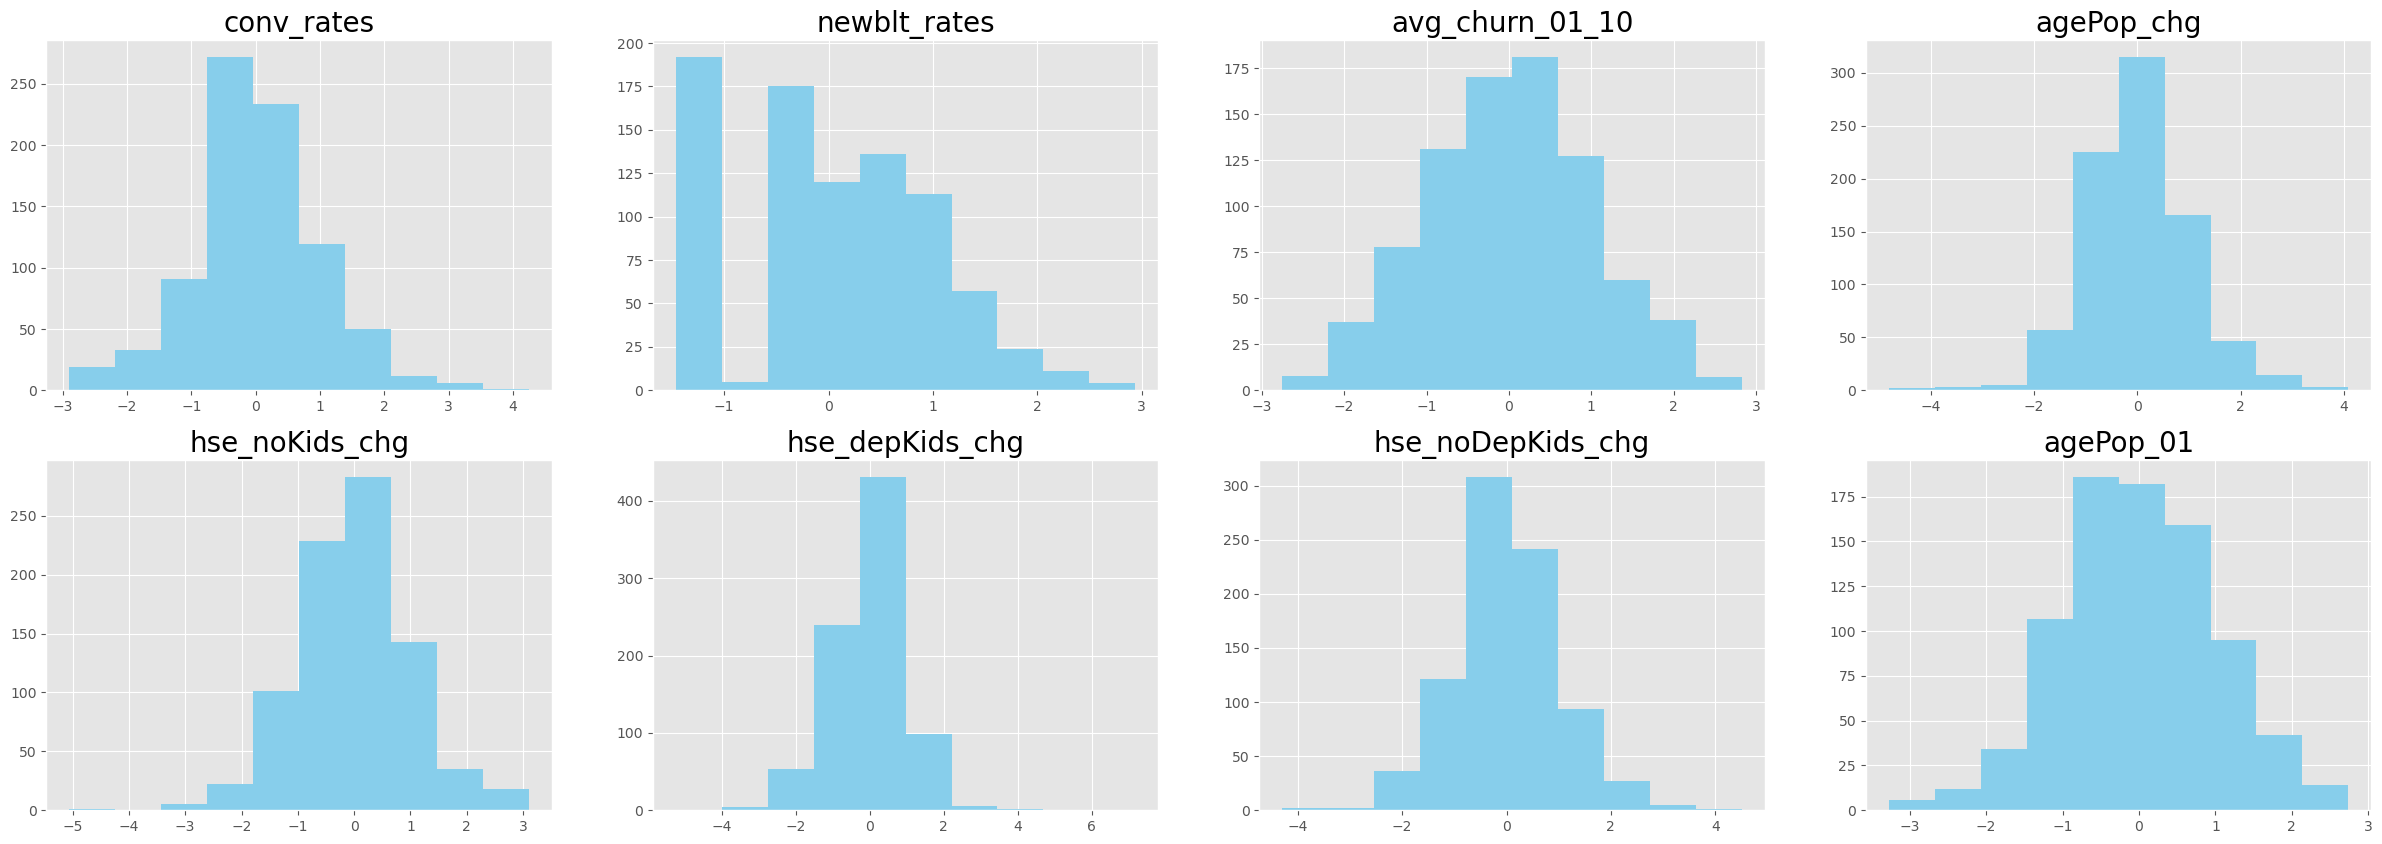

<Figure size 640x480 with 0 Axes>

In [21]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10))

counter = 0
for i in range(2):
    for j in range(4):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_1_yeoJohnson.columns):

            ax.hist(cluster_1_yeoJohnson[cluster_1_yeoJohnson.columns[counter]], label='{}'.format(cluster_1_yeoJohnson.columns[counter]), color='skyblue')
            ax.set_title(cluster_1_yeoJohnson.columns[counter], fontsize=20)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()
        
        counter += 1

plt.show()

# to output high-resolution image - uncomment the next line
plt.savefig('cluster_1_yeoJohnson.png', dpi = 100)

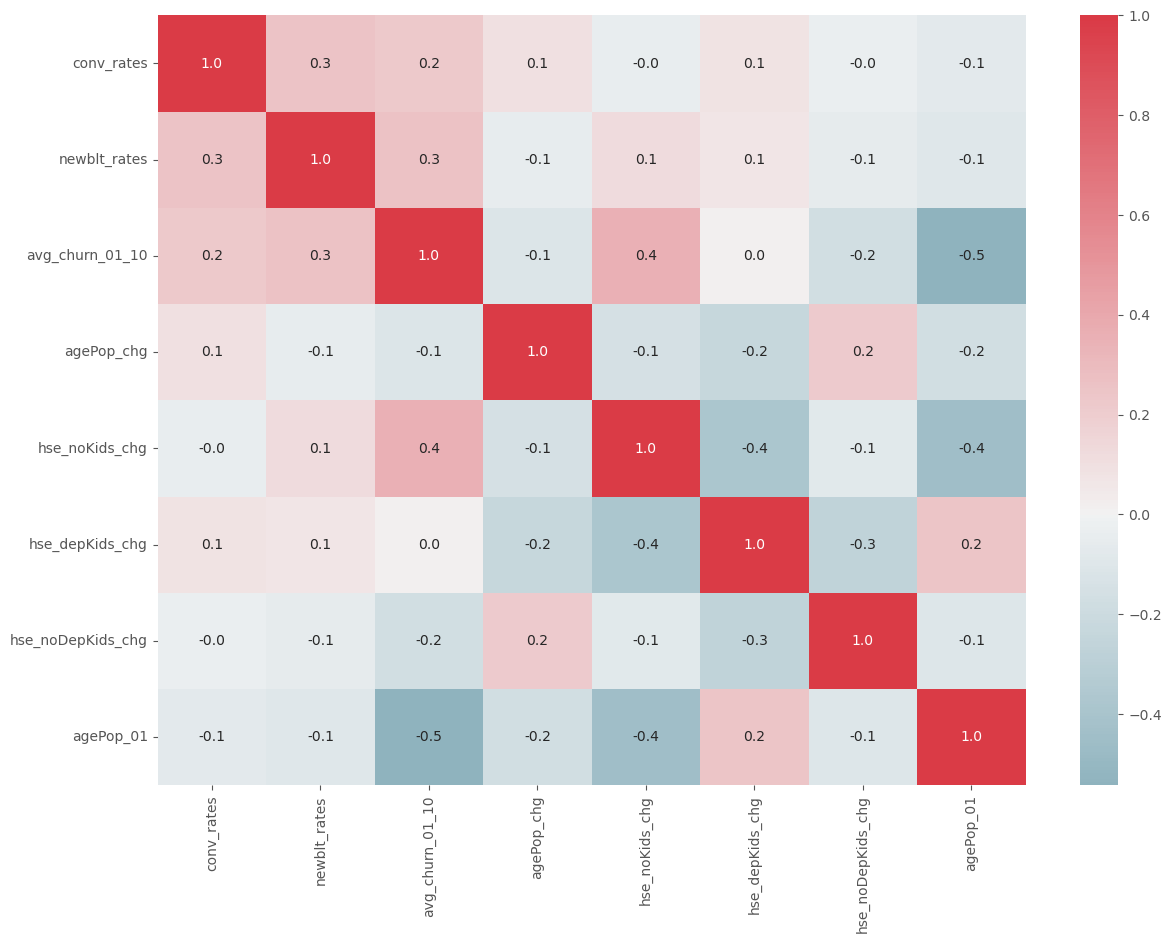

In [22]:
# check for multi-collinearity between variables

fig11, ax = plt.subplots()
fig11.set_size_inches(14, 10)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(cluster_1_yeoJohnson.corr(), cmap=cmap, annot=True, fmt=".1f", center=0)

In [15]:
# applying the inverse hyperbolic sine transformation to data variables

cluster_1_invSine = np.arcsinh(cluster_1)

In [16]:
cluster_1_invSine.head()

,conv_rates,newblt_rates,avg_churn_11_20,agePop_chg,hse_noKids_chg,hse_depKids_chg,hse_noDepKids_chg,agePop_11
LSOA_Code,,,,,,,,
E01000037,0.000000,1.290978,0.296918,1.566284,-1.915058,1.248983,1.364918,3.252646
E01000121,2.058570,1.410403,0.200357,2.232936,0.902428,-2.979137,2.642706,3.297206
E01000126,1.988606,1.605388,0.218068,1.940697,-0.019999,-3.091290,2.725596,2.416736
E01000135,3.171845,2.367969,0.415078,0.611224,-1.388645,0.490138,1.222182,3.628242
E01000140,2.240489,2.459578,0.488534,-0.909377,2.029645,1.443635,1.227591,3.164725


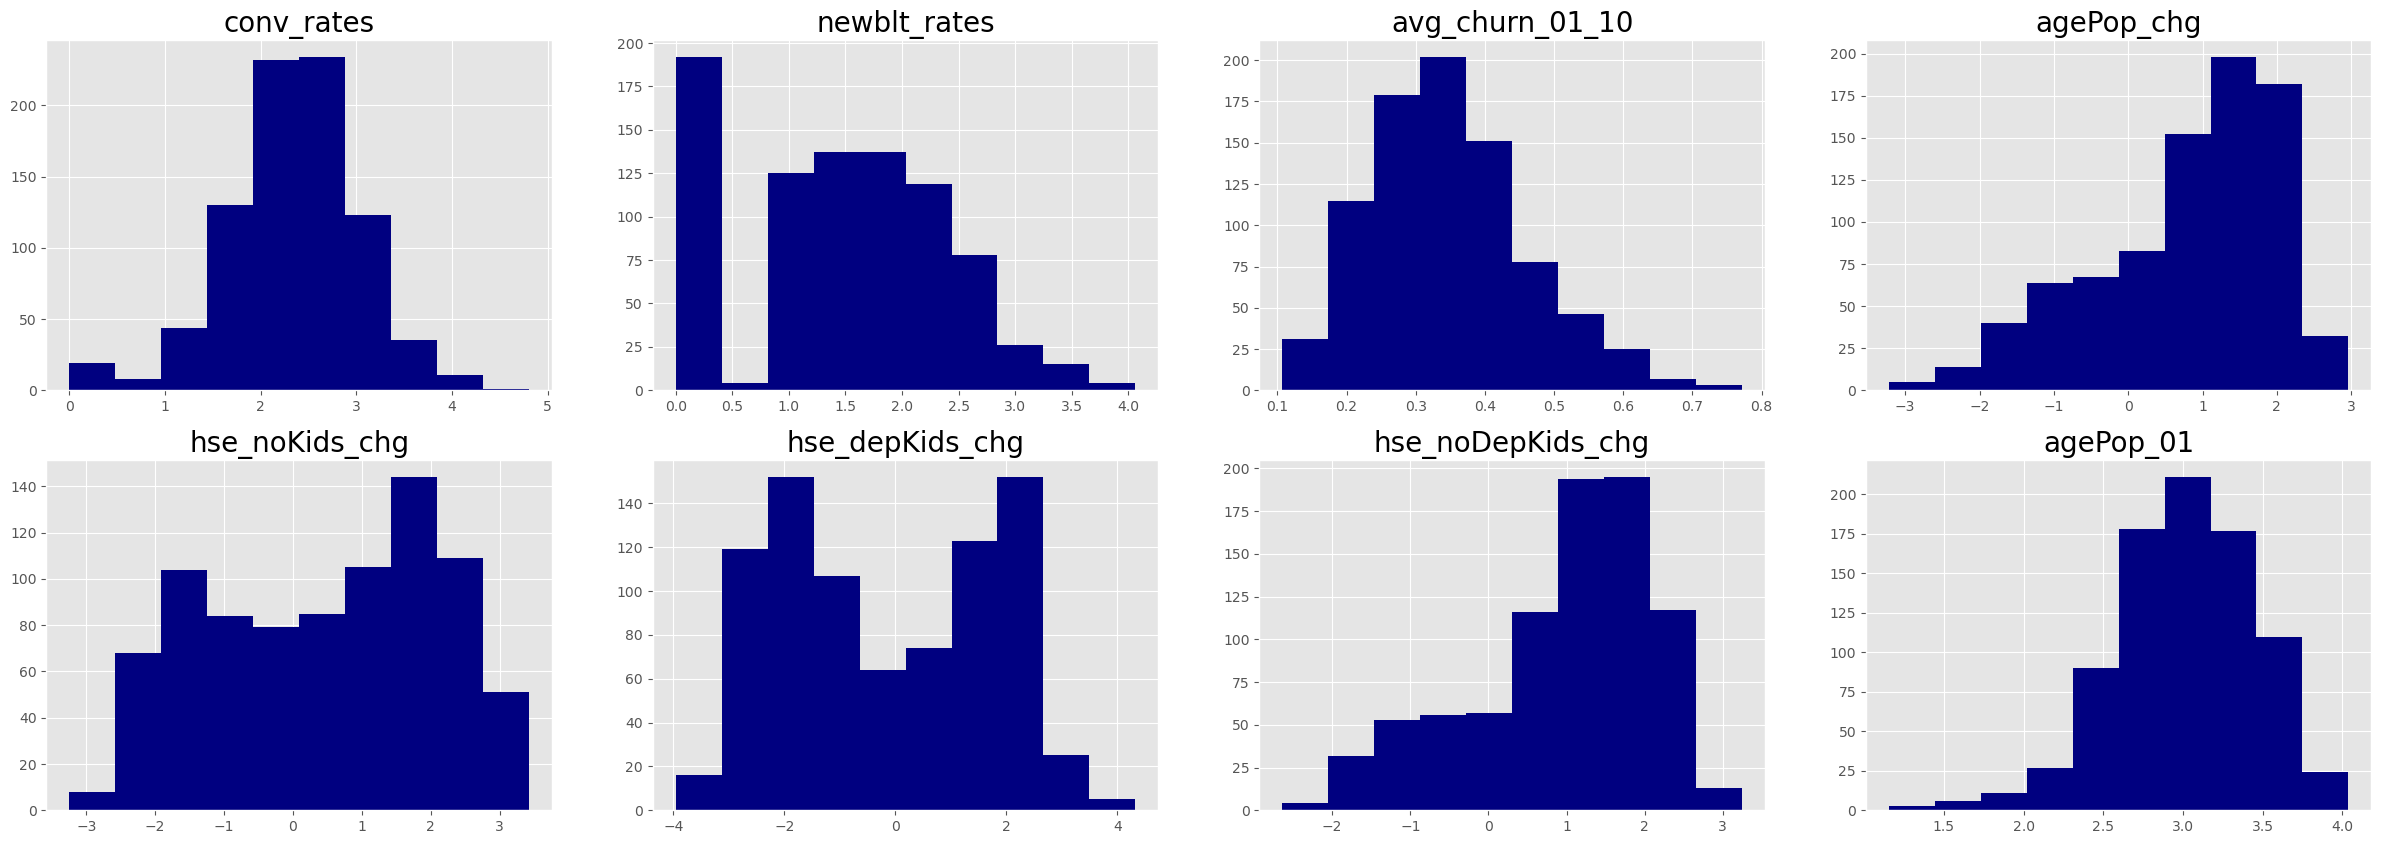

<Figure size 640x480 with 0 Axes>

In [25]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10))

counter = 0
for i in range(2):
    for j in range(4):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_1_invSine.columns):

            ax.hist(cluster_1_invSine[cluster_1_invSine.columns[counter]], label='{}'.format(cluster_1_invSine.columns[counter]),color='navy')
            ax.set_title(cluster_1_invSine.columns[counter], fontsize=20)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

# to output high-resolution image - uncomment the next line
plt.savefig('cluster_1_invSine.png', dpi = 100)

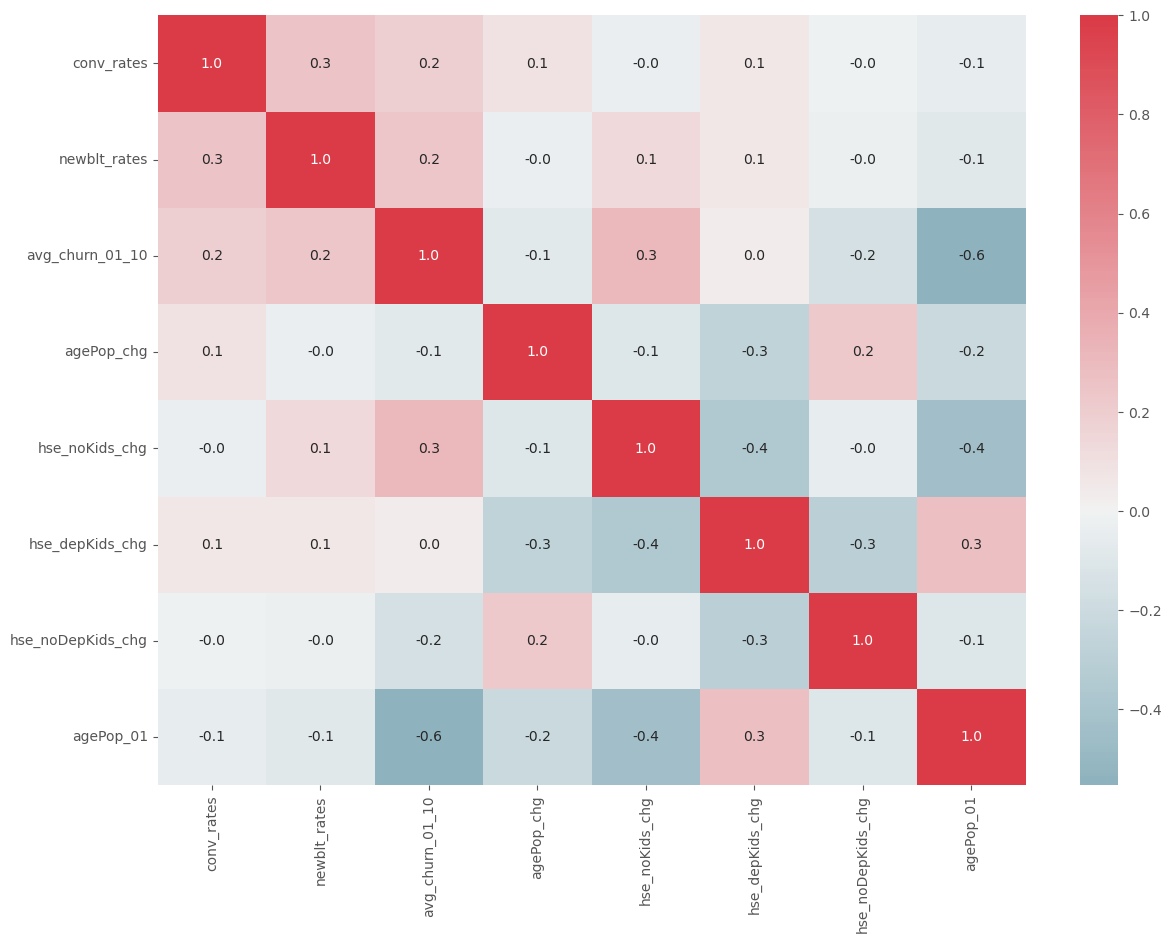

In [26]:
# check for multi-collinearity between variables

fig12, ax = plt.subplots()
fig12.set_size_inches(14, 10)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(cluster_1_invSine.corr(), cmap=cmap, annot=True, fmt=".1f", center=0)

## Scaling the Input Variables 

In [17]:
# applying z-score standardisation on all 4 datasets

from scipy.stats import zscore

cluster_1_noTrans_zscore = cluster_1_noTrans.apply(zscore)
cluster_1_cubeRoot_zscore = cluster_1_cubeRoot.apply(zscore)
cluster_1_yeoJohnson_zscore = cluster_1_yeoJohnson.apply(zscore)
cluster_1_invSine_zscore = cluster_1_invSine.apply(zscore)

In [18]:
# applying RobustScaler (inter-quartile range standardisation) on all 4 datasets

from sklearn.preprocessing import RobustScaler

transformer1 = RobustScaler().fit(cluster_1_noTrans)
cluster_1_noTrans_robust = transformer1.transform(cluster_1_noTrans)
cluster_1_noTrans_robust = pd.DataFrame(cluster_1_noTrans_robust, index = cluster_1_noTrans.index, columns = cluster_1_noTrans.columns)


transformer2 = RobustScaler().fit(cluster_1_cubeRoot)
cluster_1_cubeRoot_robust = transformer2.transform(cluster_1_cubeRoot)
cluster_1_cubeRoot_robust = pd.DataFrame(cluster_1_cubeRoot_robust, index = cluster_1_cubeRoot.index, columns = cluster_1_cubeRoot.columns)


transformer3 = RobustScaler().fit(cluster_1_yeoJohnson)
cluster_1_yeoJohnson_robust = transformer3.transform(cluster_1_yeoJohnson)
cluster_1_yeoJohnson_robust = pd.DataFrame(cluster_1_yeoJohnson_robust, index = cluster_1_yeoJohnson.index, columns = cluster_1_yeoJohnson.columns)


transformer4 = RobustScaler().fit(cluster_1_invSine)
cluster_1_invSine_robust = transformer4.transform(cluster_1_invSine)
cluster_1_invSine_robust = pd.DataFrame(cluster_1_invSine_robust, index = cluster_1_invSine.index, columns = cluster_1_invSine.columns)

In [19]:
# applying RobustScaler (inter-decile range standardisation) on all 4 datasets

transformer5 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_1_noTrans)
cluster_1_noTrans_decile = transformer5.transform(cluster_1_noTrans)
cluster_1_noTrans_decile = pd.DataFrame(cluster_1_noTrans_decile, index = cluster_1_noTrans.index, columns = cluster_1_noTrans.columns)


transformer6 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_1_cubeRoot)
cluster_1_cubeRoot_decile = transformer6.transform(cluster_1_cubeRoot)
cluster_1_cubeRoot_decile = pd.DataFrame(cluster_1_cubeRoot_decile, index = cluster_1_cubeRoot.index, columns = cluster_1_cubeRoot.columns)


transformer7 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_1_yeoJohnson)
cluster_1_yeoJohnson_decile = transformer7.transform(cluster_1_yeoJohnson)
cluster_1_yeoJohnson_decile = pd.DataFrame(cluster_1_yeoJohnson_decile, index = cluster_1_yeoJohnson.index, columns = cluster_1_yeoJohnson.columns)


transformer8 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_1_invSine)
cluster_1_invSine_decile = transformer8.transform(cluster_1_invSine)
cluster_1_invSine_decile = pd.DataFrame(cluster_1_invSine_decile, index = cluster_1_invSine.index, columns = cluster_1_invSine.columns)

In [20]:
# check for heavily-skewed variables (i.e. skewness scores beyond +/- 1)

df_full = [cluster_1_noTrans_zscore, cluster_1_cubeRoot_zscore, cluster_1_yeoJohnson_zscore, cluster_1_invSine_zscore, cluster_1_noTrans_robust, cluster_1_cubeRoot_robust, cluster_1_yeoJohnson_robust, cluster_1_invSine_robust, cluster_1_noTrans_decile, cluster_1_cubeRoot_decile, cluster_1_yeoJohnson_decile, cluster_1_invSine_decile]
df_full_name = ["cluster_1_noTrans_zscore", "cluster_1_cubeRoot_zscore", "cluster_1_yeoJohnson_zscore", "cluster_1_invSine_zscore", "cluster_1_noTrans_robust", "cluster_1_cubeRoot_robust", "cluster_1_yeoJohnson_robust", "cluster_1_invSine_robust", "cluster_1_noTrans_decile", "cluster_1_cubeRoot_decile", "cluster_1_yeoJohnson_decile", "cluster_1_invSine_decile"]

for method in range(len(df_full)):
    counter = 0
    for col in range(0,8):
        if df_full[method][df_full[method].columns[col]].skew() > 1:
            counter += 1
        elif df_full[method][df_full[method].columns[col]].skew() <- 1:
            counter += 1
    print(str(df_full_name[method]) + " has " + str(counter) + " variables with skew >1 or <-1 \n")

cluster_1_noTrans_zscore has 2 variables with skew >1 or <-1 

cluster_1_cubeRoot_zscore has 2 variables with skew >1 or <-1 

cluster_1_yeoJohnson_zscore has 0 variables with skew >1 or <-1 

cluster_1_invSine_zscore has 0 variables with skew >1 or <-1 

cluster_1_noTrans_robust has 2 variables with skew >1 or <-1 

cluster_1_cubeRoot_robust has 2 variables with skew >1 or <-1 

cluster_1_yeoJohnson_robust has 0 variables with skew >1 or <-1 

cluster_1_invSine_robust has 0 variables with skew >1 or <-1 

cluster_1_noTrans_decile has 2 variables with skew >1 or <-1 

cluster_1_cubeRoot_decile has 2 variables with skew >1 or <-1 

cluster_1_yeoJohnson_decile has 0 variables with skew >1 or <-1 

cluster_1_invSine_decile has 0 variables with skew >1 or <-1 



## Clustering

For n_clusters = 2 The average silhouette_score is : 0.2029283811435735
For n_clusters = 3 The average silhouette_score is : 0.20924416577746077
For n_clusters = 4 The average silhouette_score is : 0.18848656702690417
For n_clusters = 5 The average silhouette_score is : 0.16245139750946175
For n_clusters = 6 The average silhouette_score is : 0.16263094374702958
For n_clusters = 7 The average silhouette_score is : 0.1578978482033691
For n_clusters = 8 The average silhouette_score is : 0.1652542033464803
For n_clusters = 9 The average silhouette_score is : 0.14534388438395396
For n_clusters = 10 The average silhouette_score is : 0.1459514616978829


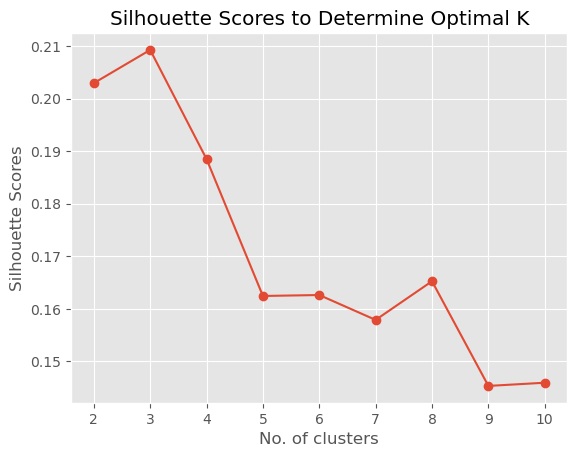

In [21]:
# check and plot silhouette scores to determine the optimal number of clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
Sum_of_squared_distances = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(cluster_1)
    Sum_of_squared_distances.append(clusterer.inertia_)
    
    silhouette_avg = silhouette_score(cluster_1, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
plt.plot(range_n_clusters, silhouette_scores, 'o-')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores to Determine Optimal K')
plt.savefig('No_of_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
# creating empty array to hold the performance measure for each cluster derived from individual dataset permutation

permutation = ["yeoJohnson-zscore", "yeoJohnson-robust(interquartile)","yeoJohnson-robust(interdecile)", "cubeRoot-zscore", "cubeRoot-robust(interquartile)","cubeRoot-robust(interdecile)","invSine-zscore", "invSine-robust(interquartile)", "invSine-robust(interdecile)"]
calinski_harabasz_scores = []

In [23]:
# k-means clustering for yeo-johnson dataset permutations

cluster_1_yeoJohnson_zscore_kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=0, n_init=1000, max_iter=50000).fit(cluster_1_yeoJohnson_zscore)
cluster_1_yeoJohnson_robust_kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=0, n_init=1000, max_iter=50000).fit(cluster_1_yeoJohnson_robust)
cluster_1_yeoJohnson_decile_kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=0, n_init=1000, max_iter=50000).fit(cluster_1_yeoJohnson_decile)

cluster_1_yeoJohnson_zscore_labels = cluster_1_yeoJohnson_zscore_kmeans.labels_
cluster_1_yeoJohnson_robust_labels = cluster_1_yeoJohnson_robust_kmeans.labels_
cluster_1_yeoJohnson_decile_labels = cluster_1_yeoJohnson_decile_kmeans.labels_

In [24]:
cluster_1_yJ_zscore_original = cluster_1[:]
cluster_1_yJ_zscore_original["cluster_1_yeoJohnson_zscore_labels"]=cluster_1_yeoJohnson_zscore_labels

C:\Users\apple\AppData\Local\Temp\ipykernel_15220\1608823444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_yJ_zscore_original["cluster_1_yeoJohnson_zscore_labels"]=cluster_1_yeoJohnson_zscore_labels


In [25]:
cluster_1_yJ_robust_original = cluster_1[:]
cluster_1_yJ_robust_original["cluster_1_yeoJohnson_robust_labels"]=cluster_1_yeoJohnson_robust_labels

C:\Users\apple\AppData\Local\Temp\ipykernel_15220\3348314599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_yJ_robust_original["cluster_1_yeoJohnson_robust_labels"]=cluster_1_yeoJohnson_robust_labels


In [26]:
cluster_1_yJ_decile_original = cluster_1[:]
cluster_1_yJ_decile_original["cluster_1_yeoJohnson_decile_labels"]=cluster_1_yeoJohnson_decile_labels

C:\Users\apple\AppData\Local\Temp\ipykernel_15220\1959466269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_yJ_decile_original["cluster_1_yeoJohnson_decile_labels"]=cluster_1_yeoJohnson_decile_labels


In [27]:
# measuring the performance for yeo-johnson dataset permutations

from sklearn import metrics
from sklearn.metrics import pairwise_distances

print(metrics.calinski_harabasz_score(cluster_1_yJ_zscore_original, cluster_1_yeoJohnson_zscore_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_yJ_zscore_original, cluster_1_yeoJohnson_zscore_labels))

print(metrics.calinski_harabasz_score(cluster_1_yJ_robust_original, cluster_1_yeoJohnson_robust_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_yJ_robust_original, cluster_1_yeoJohnson_robust_labels))

print(metrics.calinski_harabasz_score(cluster_1_yJ_decile_original, cluster_1_yeoJohnson_decile_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_yJ_decile_original, cluster_1_yeoJohnson_decile_labels))

131.4398298144811
133.14975800408303
173.92271355855974


In [28]:
# k-means clustering for cube-root dataset permutations

cluster_1_cubeRoot_zscore_kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=0, n_init=1000, max_iter=50000).fit(cluster_1_cubeRoot_zscore)
cluster_1_cubeRoot_robust_kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=0, n_init=1000, max_iter=50000).fit(cluster_1_cubeRoot_robust)
cluster_1_cubeRoot_decile_kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=0, n_init=1000, max_iter=50000).fit(cluster_1_cubeRoot_decile)

cluster_1_cubeRoot_zscore_labels = cluster_1_cubeRoot_zscore_kmeans.labels_
cluster_1_cubeRoot_robust_labels = cluster_1_cubeRoot_robust_kmeans.labels_
cluster_1_cubeRoot_decile_labels = cluster_1_cubeRoot_decile_kmeans.labels_

In [29]:
cluster_1_cB_zscore_original = cluster_1[:]
cluster_1_cB_zscore_original["cluster_1_cubeRoot_zscore_labels"]=cluster_1_cubeRoot_zscore_labels

C:\Users\apple\AppData\Local\Temp\ipykernel_15220\3815554875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_cB_zscore_original["cluster_1_cubeRoot_zscore_labels"]=cluster_1_cubeRoot_zscore_labels


In [30]:
cluster_1_cB_robust_original = cluster_1[:]
cluster_1_cB_robust_original["cluster_1_cubeRoot_robust_labels"]=cluster_1_cubeRoot_robust_labels

C:\Users\apple\AppData\Local\Temp\ipykernel_15220\1145710666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_cB_robust_original["cluster_1_cubeRoot_robust_labels"]=cluster_1_cubeRoot_robust_labels


In [31]:
cluster_1_cB_decile_original = cluster_1[:]
cluster_1_cB_decile_original["cluster_1_cubeRoot_decile_labels"]=cluster_1_cubeRoot_decile_labels

C:\Users\apple\AppData\Local\Temp\ipykernel_15220\2667953858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_cB_decile_original["cluster_1_cubeRoot_decile_labels"]=cluster_1_cubeRoot_decile_labels


In [32]:
# measuring the performance for cube-root dataset permutations

print(metrics.calinski_harabasz_score(cluster_1_cB_zscore_original, cluster_1_cubeRoot_zscore_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_cB_zscore_original, cluster_1_cubeRoot_zscore_labels))

print(metrics.calinski_harabasz_score(cluster_1_cB_robust_original, cluster_1_cubeRoot_robust_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_cB_robust_original, cluster_1_cubeRoot_robust_labels))

print(metrics.calinski_harabasz_score(cluster_1_cB_decile_original, cluster_1_cubeRoot_decile_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_cB_decile_original, cluster_1_cubeRoot_decile_labels))

136.78187422296256
31.688593644045998
172.23585003091773


In [33]:
# k-means clustering for inverse sine dataset permutations

cluster_1_invSine_zscore_kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=0, n_init=1000, max_iter=50000).fit(cluster_1_invSine_zscore)
cluster_1_invSine_robust_kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=0, n_init=1000, max_iter=50000).fit(cluster_1_invSine_robust)
cluster_1_invSine_decile_kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=0, n_init=1000, max_iter=50000).fit(cluster_1_invSine_decile)

cluster_1_invSine_zscore_labels = cluster_1_invSine_zscore_kmeans.labels_
cluster_1_invSine_robust_labels = cluster_1_invSine_robust_kmeans.labels_
cluster_1_invSine_decile_labels = cluster_1_invSine_decile_kmeans.labels_

In [34]:
cluster_1_iS_zscore_original = cluster_1[:]
cluster_1_iS_zscore_original["cluster_1_invSine_zscore_labels"]=cluster_1_invSine_zscore_labels

C:\Users\apple\AppData\Local\Temp\ipykernel_15220\2815725387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_iS_zscore_original["cluster_1_invSine_zscore_labels"]=cluster_1_invSine_zscore_labels


In [35]:
cluster_1_iS_robust_original = cluster_1[:]
cluster_1_iS_robust_original["cluster_1_invSine_robust_labels"]=cluster_1_invSine_robust_labels

C:\Users\apple\AppData\Local\Temp\ipykernel_15220\3099417990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_iS_robust_original["cluster_1_invSine_robust_labels"]=cluster_1_invSine_robust_labels


In [36]:
cluster_1_iS_decile_original = cluster_1[:]
cluster_1_iS_decile_original["cluster_1_invSine_decile_labels"]=cluster_1_invSine_decile_labels

C:\Users\apple\AppData\Local\Temp\ipykernel_15220\516682970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_iS_decile_original["cluster_1_invSine_decile_labels"]=cluster_1_invSine_decile_labels


In [65]:
# measuring the performance for inverse sine dataset permutations

print(metrics.calinski_harabasz_score(cluster_1_iS_zscore_original, cluster_1_invSine_zscore_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_iS_zscore_original, cluster_1_invSine_zscore_labels))

print(metrics.calinski_harabasz_score(cluster_1_iS_robust_original, cluster_1_invSine_robust_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_iS_robust_original, cluster_1_invSine_robust_labels))

print(metrics.calinski_harabasz_score(cluster_1_iS_decile_original, cluster_1_invSine_decile_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_1_iS_decile_original, cluster_1_invSine_decile_labels))

127.70619337424766
102.38893709215334
167.89189993625038


In [70]:
print(calinski_harabasz_scores)

[131.4398298144811, 133.59194204046346, 173.92271355855974, 136.78187422296256, 31.688593644045998, 172.23585003091773, 127.70619337424766, 102.38893709215334, 167.89189993625038]


In [37]:
calinski_harabasz_scores=[131.4398298144811, 133.59194204046346, 173.92271355855974,136.78187422296256, 31.688593644045998, 172.23585003091773, 127.70619337424766, 102.38893709215334, 167.89189993625038]

C:\Users\apple\AppData\Local\Temp\ipykernel_21000\1340232244.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(permutation, fontsize=14)
C:\Users\apple\AppData\Local\Temp\ipykernel_21000\1340232244.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(0,140,20), fontsize=14)


AttributeError: 'float' object has no attribute 'round'

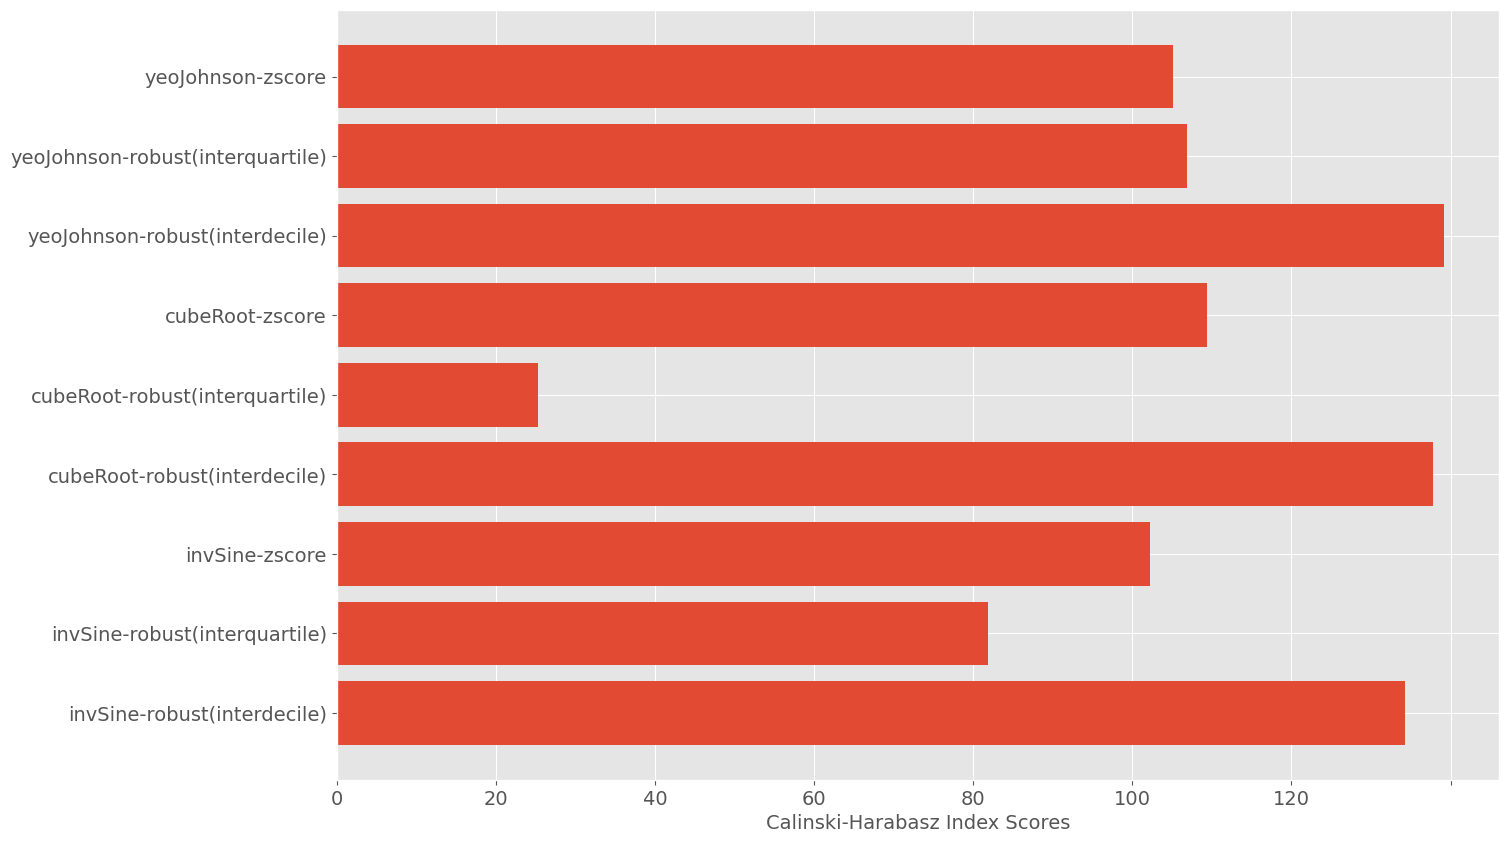

In [71]:
# visualise all performance scores using a barplot

fig, ax = plt.subplots(figsize=(15, 10))

ax.barh(permutation, calinski_harabasz_scores)
#ax.set_yticks(y_pos)
ax.set_yticklabels(permutation, fontsize=14)
ax.set_xticklabels(range(0,140,20), fontsize=14)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Calinski-Harabasz Index Scores',fontsize=14)
#ax.set_title('Quality of Clusters from Different Dataset Permutations')

for i in range(len(permutation)):
    plt.text(x = calinski_harabasz_scores[i]-10, y = i, s = calinski_harabasz_scores[i].round(3), size = 14, color="white")

plt.show()

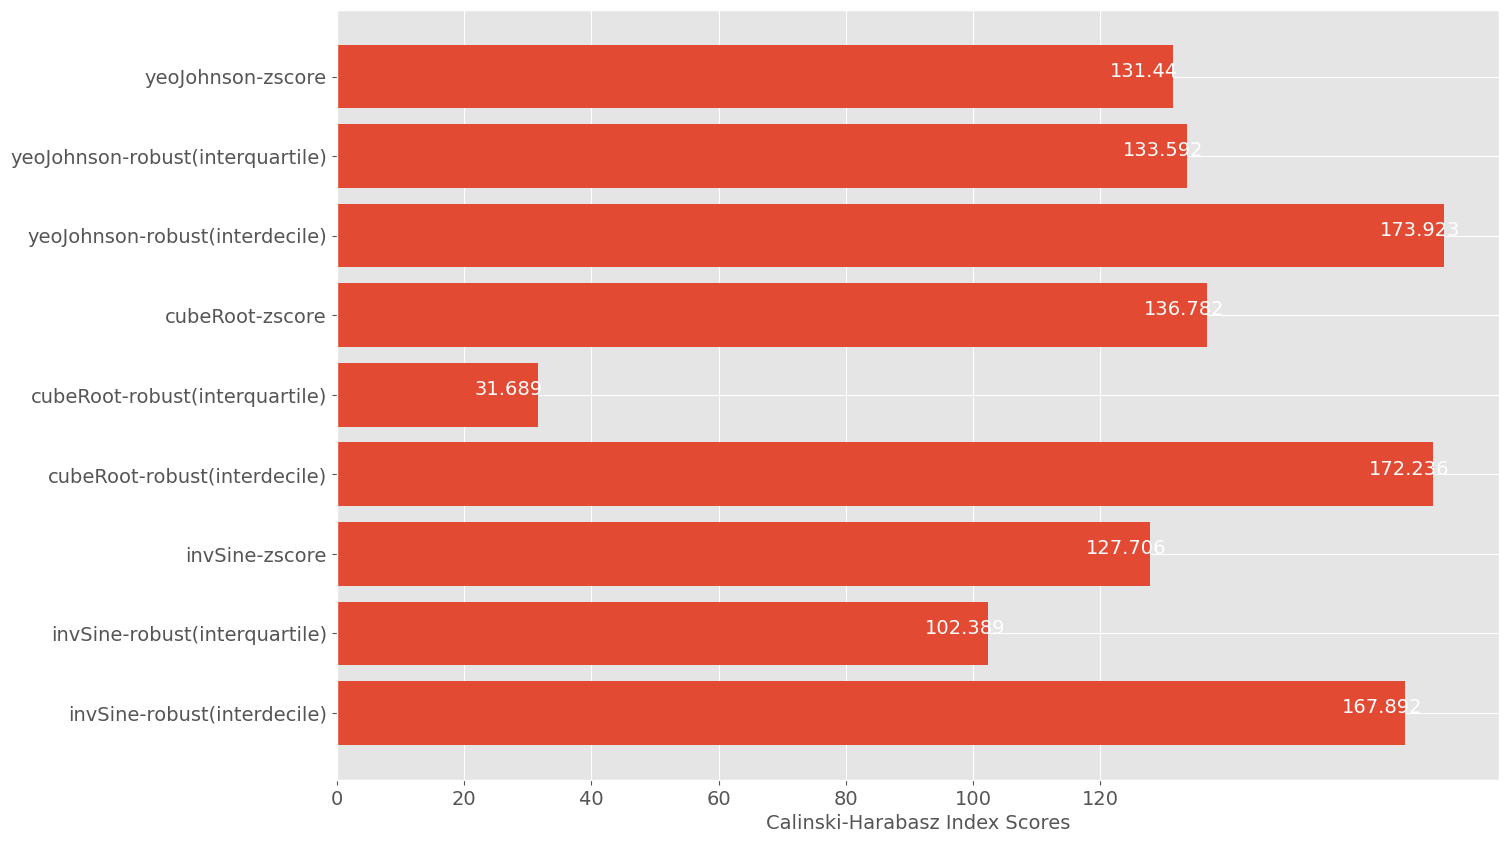

In [91]:
# Check if lengths of both lists are equal
if len(permutation) != len(calinski_harabasz_scores):
    print(f"Length mismatch: permutation has {len(permutation)} elements, but calinski_harabasz_scores has {len(calinski_harabasz_scores)} elements.")
else:
    # Create the bar plot
    fig, ax = plt.subplots(figsize=(15, 10))

    ax.barh(permutation, calinski_harabasz_scores)
    ax.set_yticks(range(len(permutation)))
    ax.set_yticklabels(permutation, fontsize=14)
    ax.set_xticks(range(0, 140, 20))
    ax.set_xticklabels(range(0, 140, 20), fontsize=14)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Calinski-Harabasz Index Scores', fontsize=14)
    # ax.set_title('Quality of Clusters from Different Dataset Permutations')

    for i in range(len(permutation)):
        plt.text(x = calinski_harabasz_scores[i] - 10, y = i, s = round(calinski_harabasz_scores[i], 3), size = 14, color="white")

    plt.savefig('No. of clusters.png') 
    plt.show()

In [38]:
# extracting cluster details of the best-performing dataset

cluster_1_yJ_decile_original.groupby("cluster_1_yeoJohnson_decile_labels").size()

cluster_1_yeoJohnson_decile_labels
0    304
1    250
2    283
dtype: int64

In [39]:
# appending cluster labels to main dataset

cluster_1_yeoJohnson_decile["cluster_1_yeoJohnson_decile_labels"]=cluster_1_yeoJohnson_decile_labels

In [40]:
# creating a new dataset for plotting purposes

radar_1 = cluster_1_yeoJohnson_decile.groupby("cluster_1_yeoJohnson_decile_labels").mean().reset_index()

In [41]:
radar_1.head()

,cluster_1_yeoJohnson_decile_labels,conv_rates,newblt_rates,avg_churn_11_20,agePop_chg,hse_noKids_chg,hse_depKids_chg,hse_noDepKids_chg,agePop_11
0,0,0.308405,0.219363,0.235313,0.014056,0.090531,0.144364,-0.137323,-0.139546
1,1,-0.145789,-0.090472,0.012550,0.173846,0.221330,-0.411857,0.267380,-0.203528
2,2,-0.170399,-0.146532,-0.293650,-0.084645,-0.268861,0.174804,-0.055079,0.381918


In [42]:
# check the means of the entire dataset

cluster_1_yeoJohnson_decile.mean()

conv_rates                            0.010854
newblt_rates                          0.003106
avg_churn_11_20                      -0.010072
agePop_chg                            0.028411
hse_noKids_chg                        0.008084
hse_depKids_chg                      -0.011479
hse_noDepKids_chg                     0.011363
agePop_11                             0.017657
cluster_1_yeoJohnson_decile_labels    0.974910
dtype: float64

In [43]:
# appending dataset average values to main dataset

radar_avg = cluster_1_yeoJohnson_decile.drop(columns = ["cluster_1_yeoJohnson_decile_labels"]).mean().reset_index()

In [44]:
# rename columns for legibility

radar_avg = radar_avg.rename(columns={"index":"var", 0: "value"})

In [45]:
radar_avg.head()

,var,value
0,conv_rates,0.010854
1,newblt_rates,0.003106
2,avg_churn_11_20,-0.010072
3,agePop_chg,0.028411
4,hse_noKids_chg,0.008084


C:\Users\apple\AppData\Local\Temp\ipykernel_15220\3106800.py:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, polar=True)


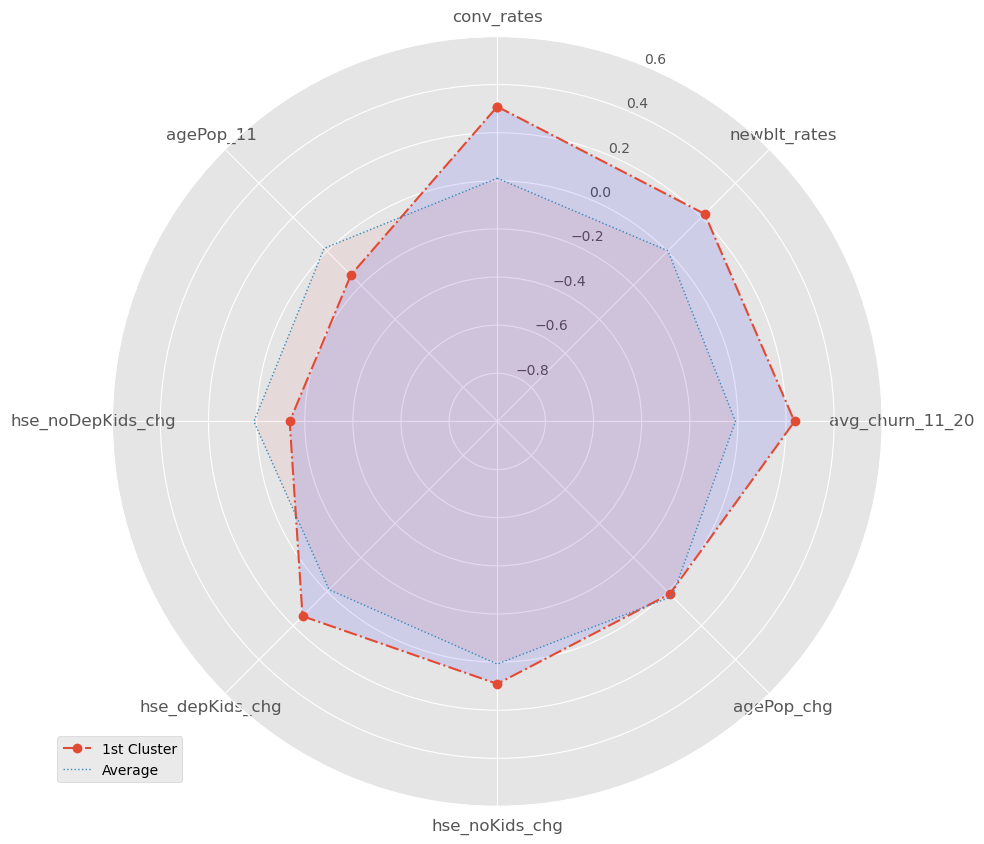

In [46]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 1st cluster

from math import pi

fig1, ax = plt.subplots()
fig1.set_size_inches(14, 10)

# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# plotting for the 1st variable
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variables
categories=list(radar_1)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size = 12)
 
# Draw ylabels
plt.ylim(-1,0.6)
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, linestyle='dashdot', marker="o", label="1st Cluster")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=':', label="Average")
ax.fill(angles, values, 'r', alpha=0.05)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig('Gentrification Cluster.png', dpi = 100)

C:\Users\apple\AppData\Local\Temp\ipykernel_15220\1925487049.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, polar=True)


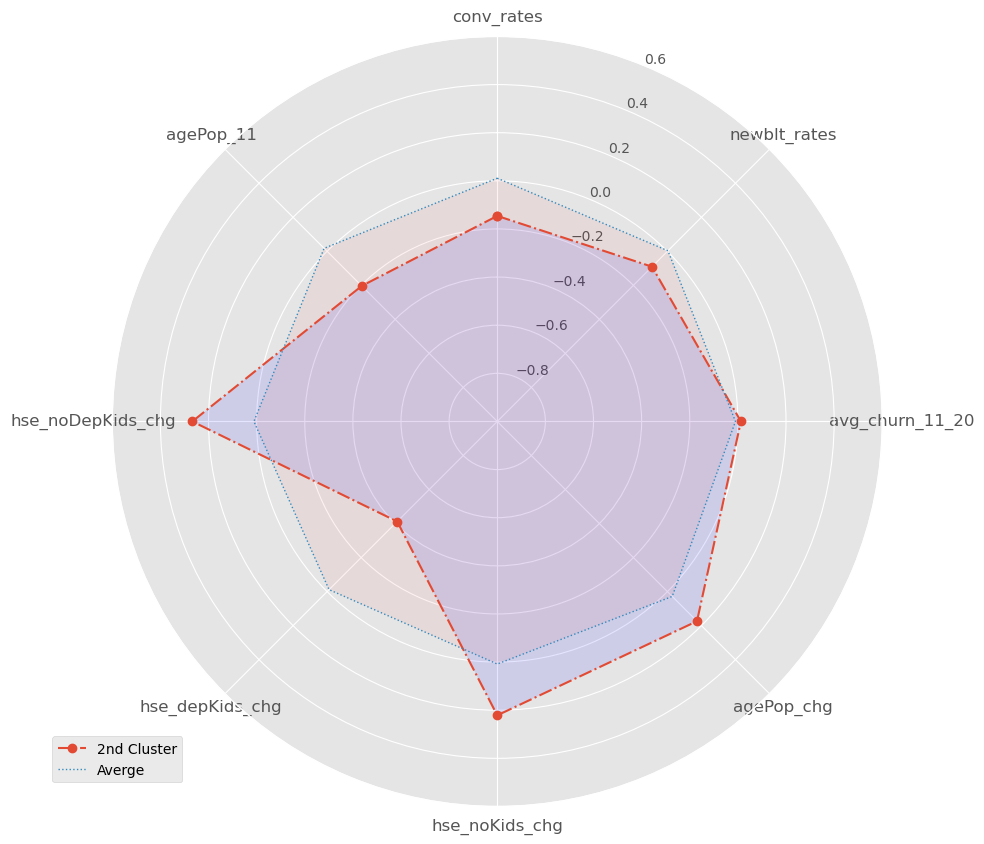

In [47]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 2nd cluster

fig2, ax = plt.subplots()
fig2.set_size_inches(14, 10)

# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# plotting for the 1st variable
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size = 12)
 
# Draw ylabels
plt.ylim(-1,0.6)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_1.iloc[1,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, linestyle='dashdot', marker="o", label="2nd Cluster")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=':', label="Averge")
ax.fill(angles, values, 'r', alpha=0.05)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig('Incumbent Upgrading Cluster.png', dpi = 100)

C:\Users\apple\AppData\Local\Temp\ipykernel_15220\210668689.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, polar=True)


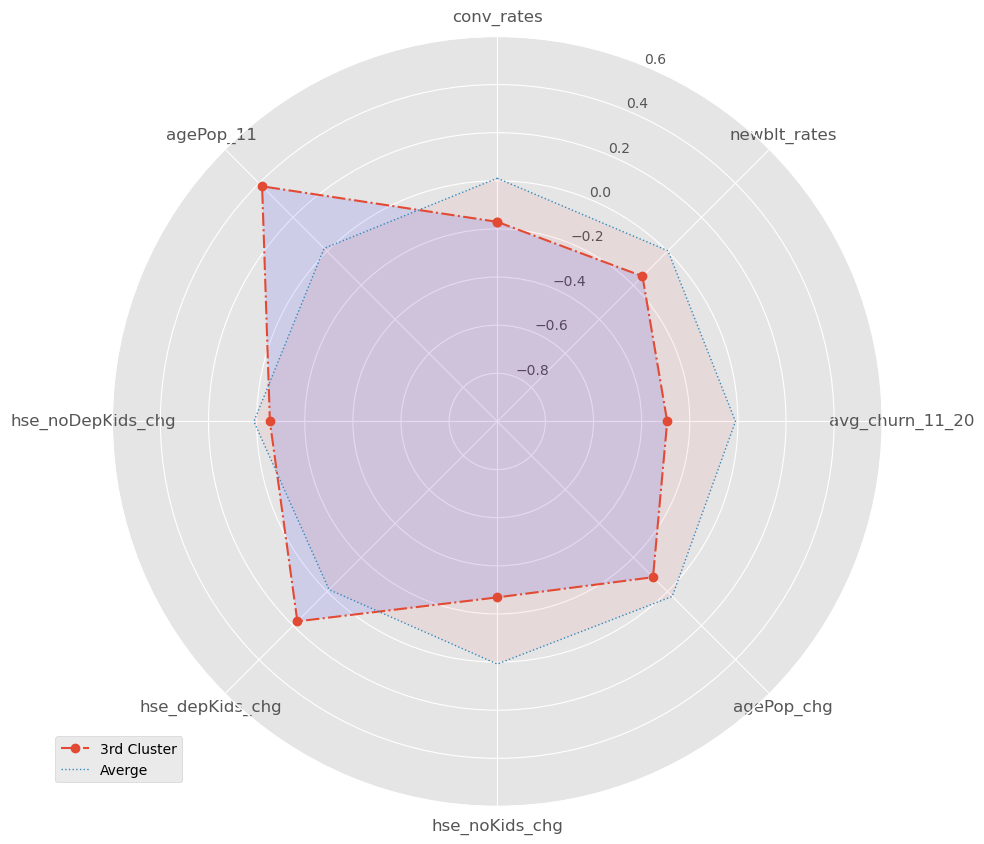

In [48]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 3rd cluster

fig3, ax = plt.subplots()
fig3.set_size_inches(14, 10)

# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# plotting for 1st variable
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size = 12)
 
# Draw ylabels
plt.ylim(-1,0.6)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_1.iloc[2,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, linestyle='dashdot', marker="o", label="3rd Cluster")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=':', label="Averge")
ax.fill(angles, values, 'r', alpha=0.05)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig('Re-Urbanization Cluster.png', dpi = 100)

In [84]:
# create new feature column in main dataset to host label categories

cluster_1_yJ_decile_cat = cluster_1_yJ_decile_original[:].reset_index()
cluster_1_yJ_decile_cat["cluster_1_yJ_decile_cat"] = ""

In [85]:
cluster_1_yJ_decile_cat.head()

,LSOA_Code,conv_rates,newblt_rates,avg_churn_01_10,agePop_chg,hse_noKids_chg,hse_depKids_chg,hse_noDepKids_chg,agePop_01,cluster_1_yeoJohnson_decile_labels,cluster_1_yJ_decile_cat
0,E01000037,0.00000,1.68067,0.3013,2.29,-3.32,1.60,1.83,12.91,2,
1,E01000121,3.85356,1.92678,0.2017,4.61,1.03,-9.81,6.99,13.50,1,
2,E01000126,3.58423,2.38949,0.2198,3.41,-0.02,-10.98,7.60,5.56,1,
3,E01000135,11.90476,5.29101,0.4271,0.65,-1.88,0.51,1.55,18.81,0,
4,E01000140,4.64576,5.80720,0.5082,-1.04,3.74,2.00,1.56,11.82,0,


In [86]:
# parse cluster labels to derive their categories 

for i in range(len(cluster_1_yJ_decile_cat)):
    if cluster_1_yJ_decile_cat.loc[i, "cluster_1_yeoJohnson_decile_labels"]==0:
        cluster_1_yJ_decile_cat.loc[i, "cluster_1_yJ_decile_cat"]="NRW"
    elif cluster_1_yJ_decile_cat.loc[i, "cluster_1_yeoJohnson_decile_labels"]==1:
        cluster_1_yJ_decile_cat.loc[i, "cluster_1_yJ_decile_cat"]="GEN"
    elif cluster_1_yJ_decile_cat.loc[i, "cluster_1_yeoJohnson_decile_labels"]==2:
        cluster_1_yJ_decile_cat.loc[i, "cluster_1_yJ_decile_cat"]="IUP"

In [87]:
# checkpoint - output file
cluster_1_yJ_decile_cat.to_csv("cluster_1_cat.csv")

In [88]:
# extract only gentrifying LSOAs

cluster_1_yJ_decile_gen = cluster_1_yJ_decile_cat.loc[cluster_1_yJ_decile_cat["cluster_1_yJ_decile_cat"]=="GEN"]

In [89]:
cluster_1_yJ_decile_gen.head()

,LSOA_Code,conv_rates,newblt_rates,avg_churn_01_10,agePop_chg,hse_noKids_chg,hse_depKids_chg,hse_noDepKids_chg,agePop_01,cluster_1_yeoJohnson_decile_labels,cluster_1_yJ_decile_cat
1,E01000121,3.85356,1.92678,0.2017,4.61,1.03,-9.81,6.99,13.50,1,GEN
2,E01000126,3.58423,2.38949,0.2198,3.41,-0.02,-10.98,7.60,5.56,1,GEN
5,E01000152,2.57069,0.00000,0.3912,0.51,9.06,-15.21,2.27,4.63,1,GEN
6,E01000154,5.97907,0.00000,0.4297,-0.92,3.63,-3.66,2.33,9.42,1,GEN
9,E01000189,1.90718,2.54291,0.5491,-0.38,9.71,-10.05,2.28,6.06,1,GEN


In [90]:
# checkpoint - output file
cluster_1_yJ_decile_gen.to_csv("cluster_1_gen.csv")